In [48]:
import numpy as np
import torch
import math
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
X = torch.linspace(-math.pi, math.pi, 2000)
X

tensor([-3.1416, -3.1384, -3.1353,  ...,  3.1353,  3.1384,  3.1416])

In [4]:
y = torch.sin(X)
y

tensor([ 8.7423e-08, -3.1430e-03, -6.2863e-03,  ...,  6.2863e-03,
         3.1430e-03, -8.7423e-08])

In [5]:
x_train = X.reshape(-1,1)
y_train = torch.reshape(y,(-1,1))

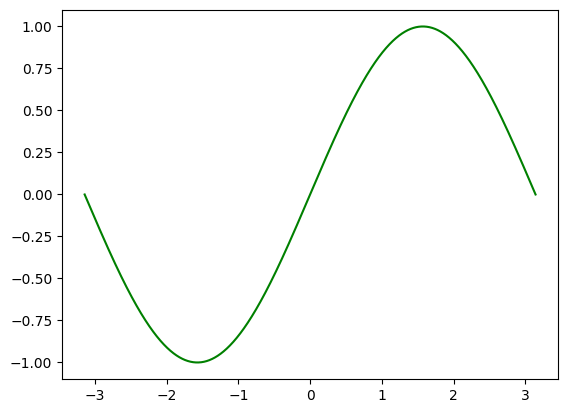

In [6]:
plt.plot(X, y, color='green')
plt.show()

In [112]:
class SimpleANN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.hiddenL = torch.nn.Linear(1,3)
        self.outputL = torch.nn.Linear(3,1)
    
    def forward(self,X):
        l1 = self.hiddenL(X)
        print("***Net Input of Hidden Layer***\n",l1)
        print(f"Size: {l1.shape}")

        h1 = torch.relu(l1)
        print(f"***Hidden Layer OP***\n {h1}")
        print(f"Size: {h1.shape}")

        o1 = self.outputL(h1)
        print(f"***Predicted Value***\n {o1}")
        print(f"Size: {o1.shape}")

        return o1

model = SimpleANN()
print(model)

SimpleANN(
  (hiddenL): Linear(in_features=1, out_features=3, bias=True)
  (outputL): Linear(in_features=3, out_features=1, bias=True)
)


In [113]:
criteron = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=10e-2)
epochs = 1001

In [114]:
losses = []

for epoch in range(epochs):
    optimizer.zero_grad()

    output = model(x_train)

    loss = criteron(y_train,output)
    #print(f"Loss = {loss}")

    if epoch % 100 == 0:
        print(f"Epoch: {epoch}, Loss: {loss.item()}")
    
    if epoch == 1 or epoch == 50 or epoch == 100 or epoch == 200 or epoch == 500 or epoch == 1000:
        losses.append(loss.item())

    '''print("\nBEFORE BACK PROPAGATION")
    print(f"Hidden Layer Weights: {model.hiddenL.weight}, Biases: {model.hiddenL.bias}")
    print(f"Hidden weight grad: {model.hiddenL.weight.grad}, Bias Grad: {model.hiddenL.bias.grad}")
    print(f"Output Layer Weights: {model.outputL.weight}, Biases: {model.outputL.bias}")
    print(f"Output weight grad: {model.outputL.weight.grad}, Bias: {model.outputL.bias.grad}")'''

    loss.backward()

    '''print("\nAfter Back Propagation:")
    print(f"Hidden Layer Weights: {model.hiddenL.weight}, Biases: {model.hiddenL.bias}")
    print(f"Hidden weight grad: {model.hiddenL.weight.grad}, Bias Grad: {model.hiddenL.bias.grad}")
    print(f"Output Layer Weights: {model.outputL.weight}, Biases: {model.outputL.bias}")
    print(f"Output weight grad: {model.outputL.weight.grad}, Bias: {model.outputL.bias.grad}")'''

    optimizer.step()
    
    '''print("\nAfter Changing Weight")
    print(f"Hidden Layer Weights: {model.hiddenL.weight}, Biases: {model.hiddenL.bias}")
    print(f"Hidden weight grad: {model.hiddenL.weight.grad}, Bias Grad: {model.hiddenL.bias.grad}")
    print(f"Output Layer Weights: {model.outputL.weight}, Biases: {model.outputL.bias}")
    print(f"Output weight grad: {model.outputL.weight.grad}, Bias: {model.outputL.bias.grad}")'''


***Net Input of Hidden Layer***
 tensor([[ 2.6048, -3.5971, -1.8564],
        [ 2.6030, -3.5942, -1.8538],
        [ 2.6012, -3.5914, -1.8513],
        ...,
        [-0.9001,  2.1474,  3.2632],
        [-0.9018,  2.1503,  3.2658],
        [-0.9036,  2.1531,  3.2684]], grad_fn=<AddmmBackward0>)
Size: torch.Size([2000, 3])
***Hidden Layer OP***
 tensor([[2.6048, 0.0000, 0.0000],
        [2.6030, 0.0000, 0.0000],
        [2.6012, 0.0000, 0.0000],
        ...,
        [0.0000, 2.1474, 3.2632],
        [0.0000, 2.1503, 3.2658],
        [0.0000, 2.1531, 3.2684]], grad_fn=<ReluBackward0>)
Size: torch.Size([2000, 3])
***Predicted Value***
 tensor([[-1.1423],
        [-1.1419],
        [-1.1414],
        ...,
        [-0.2064],
        [-0.2060],
        [-0.2057]], grad_fn=<AddmmBackward0>)
Size: torch.Size([2000, 1])
Epoch: 0, Loss: 0.7052522897720337
***Net Input of Hidden Layer***
 tensor([[ 2.5766, -3.6371, -1.8603],
        [ 2.5748, -3.6341, -1.8577],
        [ 2.5731, -3.6312, -1.8551],

In [115]:
torch.save(model,"first_model.pt")

In [116]:
model = torch.load("first_model.pt")
model.eval()

ypred = model(x_train[300])
print(type(X[300]), ypred, torch.sin(x_train[300]))

***Net Input of Hidden Layer***
 tensor([ 2.3233, -4.1682, -0.9420], grad_fn=<ViewBackward0>)
Size: torch.Size([3])
***Hidden Layer OP***
 tensor([2.3233, 0.0000, 0.0000], grad_fn=<ReluBackward0>)
Size: torch.Size([3])
***Predicted Value***
 tensor([-0.6932], grad_fn=<ViewBackward0>)
Size: torch.Size([1])
<class 'torch.Tensor'> tensor([-0.6932], grad_fn=<ViewBackward0>) tensor([-0.8093])


***Net Input of Hidden Layer***
 tensor([[ 2.9910, -5.2800, -1.8090],
        [ 2.9888, -5.2763, -1.8061],
        [ 2.9865, -5.2726, -1.8032],
        ...,
        [-1.4534,  2.1210,  3.9624],
        [-1.4557,  2.1247,  3.9653],
        [-1.4579,  2.1284,  3.9682]], grad_fn=<AddmmBackward0>)
Size: torch.Size([2000, 3])
***Hidden Layer OP***
 tensor([[2.9910, 0.0000, 0.0000],
        [2.9888, 0.0000, 0.0000],
        [2.9865, 0.0000, 0.0000],
        ...,
        [0.0000, 2.1210, 3.9624],
        [0.0000, 2.1247, 3.9653],
        [0.0000, 2.1284, 3.9682]], grad_fn=<ReluBackward0>)
Size: torch.Size([2000, 3])
***Predicted Value***
 tensor([[-0.4541],
        [-0.4549],
        [-0.4557],
        ...,
        [-0.1751],
        [-0.1771],
        [-0.1792]], grad_fn=<AddmmBackward0>)
Size: torch.Size([2000, 1])
<class 'numpy.ndarray'>
(2000, 1) <class 'numpy.ndarray'>


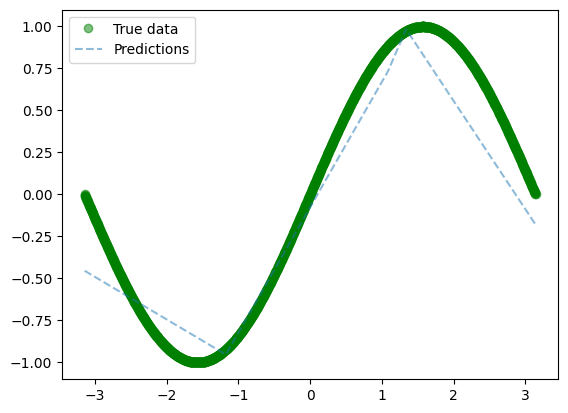

In [119]:
predicted = model(x_train).data.numpy()
print(type(predicted))
print(predicted.shape, type(predicted))

plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

In [120]:
array = [[1,50,100,200,500,1000], losses]
df = pd.DataFrame(array).T
df.columns = ["Epochs","Losses"]
df


,Epochs,Losses
0,1.0,0.244538
1,50.0,0.105716
2,100.0,0.079062
3,200.0,0.050224
4,500.0,0.026969
5,1000.0,0.039844


In [122]:
path = r"C:\Users\psg\Desktop\22n208"
df.to_csv("output.csv",index=False)

In [ ]:
'''create table:

change no of epoch

50
500
1000

explore how the loss is changing,

change learning rate and see how its going -> make it 1, 0.1 0.01 0.001

fix no of epochs'''